In [12]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

import xgboost as xgb


In [4]:
df = pd.read_csv("Product Demand Forecasting for SupplyNet Manufacturing.csv")

df.head()


,product_id,product_category,historical_sales,seasonality,promotional_activity,economic_index,market_trend_score,predicted_demand_units
0,1,Electronics,254,High,No,102.13,0.86,418.0
1,2,Furniture,240,Medium,Yes,97.57,0.68,370.0
2,3,Toys,235,Medium,Yes,107.82,0.79,391.0
3,4,Toys,259,High,No,120.74,0.42,395.0
4,5,Electronics,229,Medium,No,88.39,0.31,200.0


In [6]:
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   product_id              1000 non-null   int64  
 1   product_category        1000 non-null   object 
 2   historical_sales        1000 non-null   int64  
 3   seasonality             1000 non-null   object 
 4   promotional_activity    1000 non-null   object 
 5   economic_index          1000 non-null   float64
 6   market_trend_score      1000 non-null   float64
 7   predicted_demand_units  1000 non-null   float64
dtypes: float64(3), int64(2), object(3)
memory usage: 62.6+ KB


,0
product_id,0
product_category,0
historical_sales,0
seasonality,0
promotional_activity,0
economic_index,0
market_trend_score,0
predicted_demand_units,0


In [7]:
df.describe()

,product_id,historical_sales,economic_index,market_trend_score,predicted_demand_units
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,250.129000,100.092950,0.494790,323.737000
std,288.819436,15.784724,9.531953,0.285543,92.830886
min,1.000000,201.000000,72.210000,0.000000,76.000000
25%,250.750000,240.000000,93.605000,0.250000,257.000000
50%,500.500000,250.000000,100.135000,0.500000,323.000000
75%,750.250000,261.000000,106.272500,0.740000,384.000000
max,1000.000000,306.000000,134.300000,1.000000,578.000000


In [15]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

df_processed = df.copy()

# Encode categorical features
for col in df_processed.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df_processed[col] = le.fit_transform(df_processed[col])

X = df_processed.drop(columns=['predicted_demand_units'])
y = df_processed['predicted_demand_units']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [17]:

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


In [18]:
model = xgb.XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [19]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Squared Error: 979.33
R^2 Score: 0.89


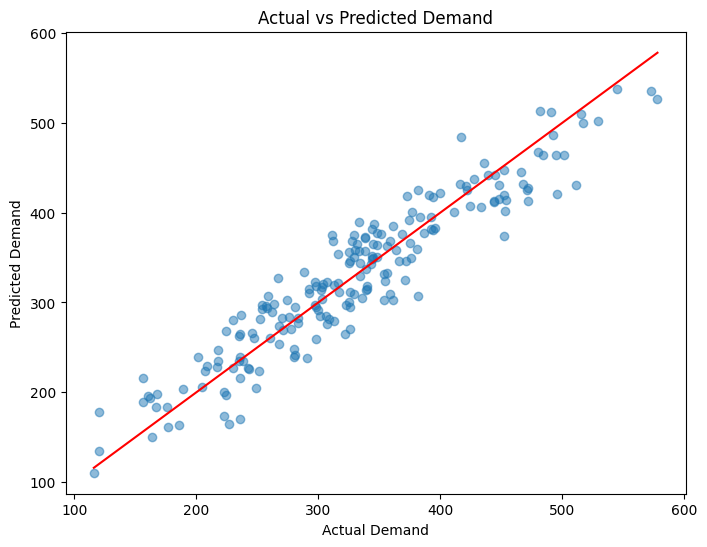

In [20]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Demand")
plt.ylabel("Predicted Demand")
plt.title("Actual vs Predicted Demand")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()
